<h1>LOAN DATA ANALYSIS</h1>

In [18]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [19]:
# Load Dataset     
df = pd.read_csv('D:\loan_data.csv')


In [20]:
# Display initial dataset information
print("Initial Data Summary:")
print(df.info())


Initial Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB
None


In [ ]:
# Cleaning the Dataset
## Handle Missing Values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [22]:
# Convert Categorical to Numerical for Analysis
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

<h2>Data Cleaning</h2>

In [23]:
# Display cleaned dataset information
print("\nCleaned Data Summary:")
print(df.info())


Cleaned Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  381 non-null    object 
 1   Dependents               381 non-null    object 
 2   ApplicantIncome          381 non-null    int64  
 3   CoapplicantIncome        381 non-null    float64
 4   LoanAmount               381 non-null    int64  
 5   Loan_Amount_Term         370 non-null    float64
 6   Credit_History           381 non-null    float64
 7   Loan_Status              381 non-null    object 
 8   Gender_Female            381 non-null    bool   
 9   Gender_Male              381 non-null    bool   
 10  Married_No               381 non-null    bool   
 11  Married_Yes              381 non-null    bool   
 12  Education_Graduate       381 non-null    bool   
 13  Education_Not Graduate   381 non-null    bool   
 14  Sel

In [24]:
print(df.columns)


Index(['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


In [26]:
# Save the cleaned dataset
df.to_csv('cleanedd_loan_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_loan_data.csv'")



Cleaned data saved to 'cleaned_loan_data.csv'


<h1>vizualization</h1>

<h2> Loan Approval by Gender</h2>

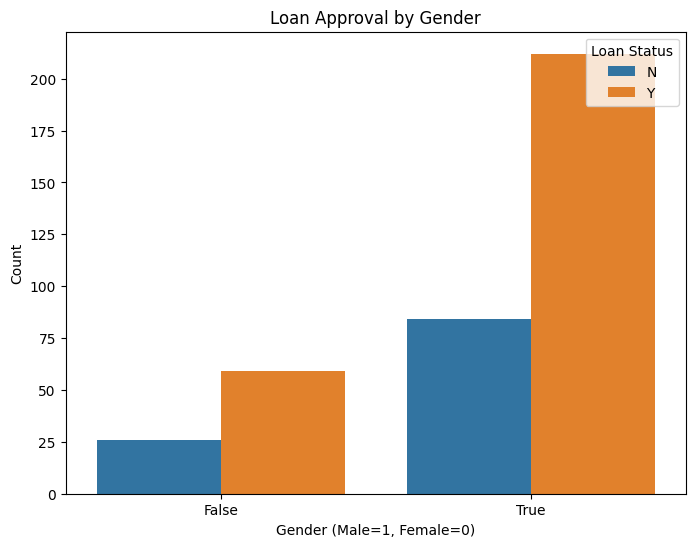

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender_Male', hue='Loan_Status', data=df)
plt.title('Loan Approval by Gender')
plt.xlabel('Gender (Male=1, Female=0)')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()


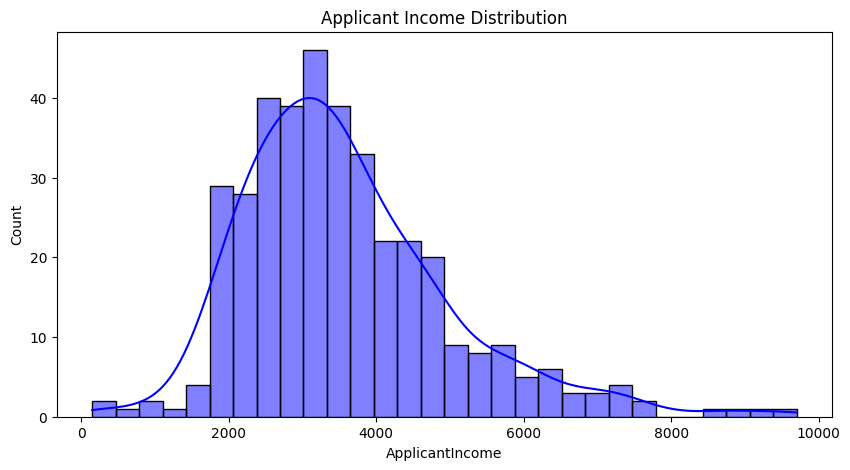

In [21]:
## Income Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['ApplicantIncome'], kde=True, color='blue', bins=30)
plt.title("Applicant Income Distribution")
plt.show()

<h2>Distribution of Loan Amounts</h2>

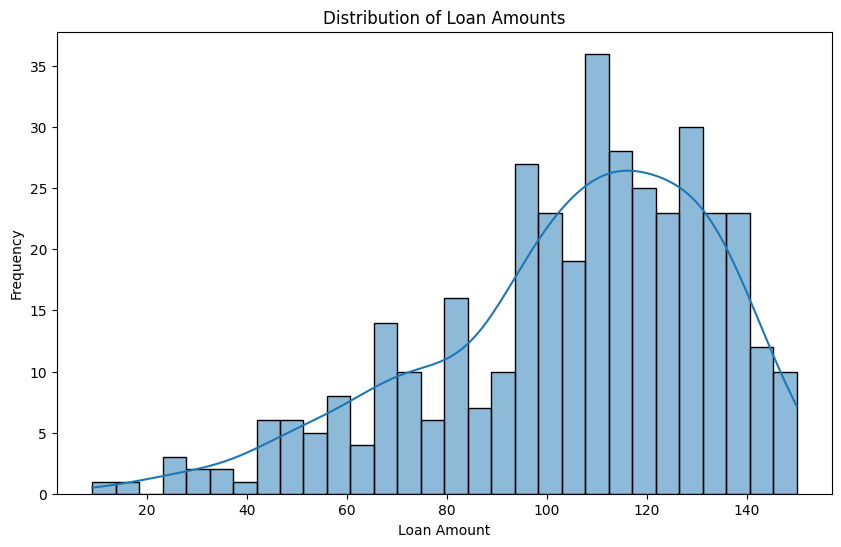

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount'], kde=True, bins=30)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


<h2>Loan Approval by Education Level</h2>

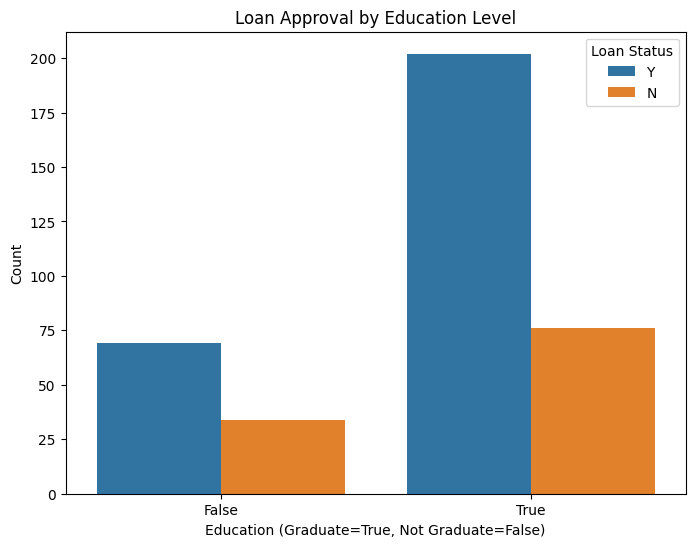

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education_Graduate', hue='Loan_Status', data=df)
plt.title('Loan Approval by Education Level')
plt.xlabel('Education (Graduate=True, Not Graduate=False)')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()


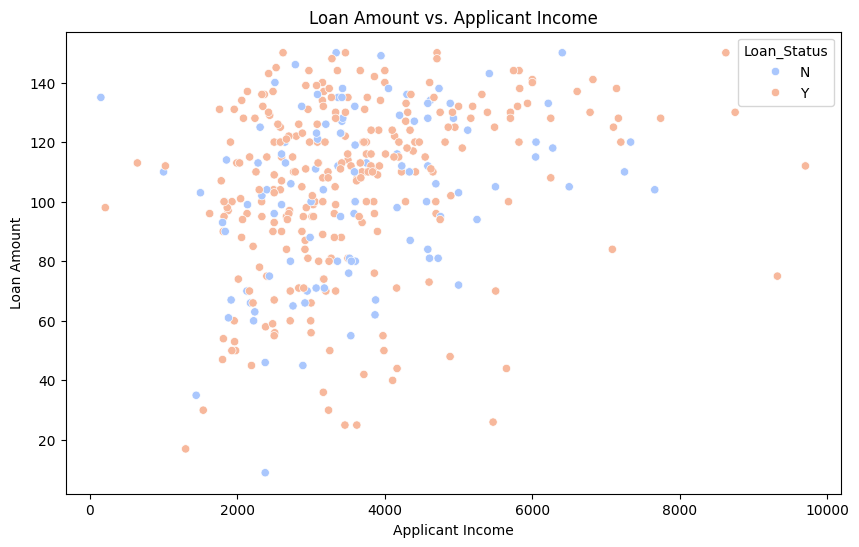

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df, palette='coolwarm')
plt.title('Loan Amount vs. Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()


<h2>Loan Approval by Number of Dependents<h2/>

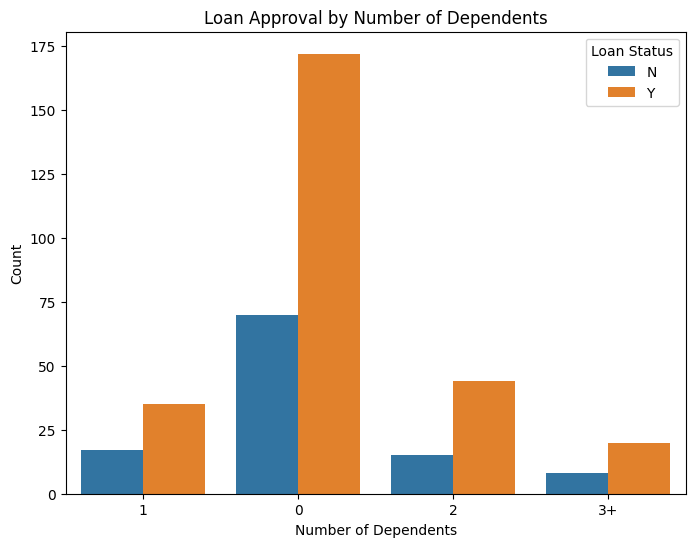

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', hue='Loan_Status', data=df)
plt.title('Loan Approval by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()


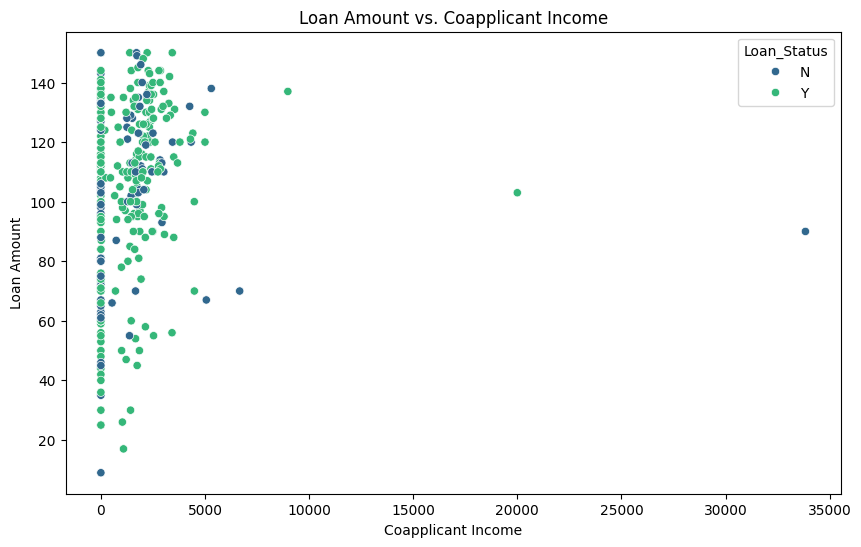

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status', data=df, palette='viridis')
plt.title('Loan Amount vs. Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Loan Amount')
plt.show()
